In [2]:
import json
import os
import sys

In [3]:
filename = "/home/severine/MOOCS/UDACITY/DEEP_LEARNING/TP/P2_dog_classification/Transfer_Learning_Solution_copy.ipynb"
with open(filename) as f :
    notebook = json.load(f)

In [4]:
type(notebook)

dict

In [5]:
len(notebook)

4

In [6]:
notebook.keys()

dict_keys(['nbformat', 'nbformat_minor', 'metadata', 'cells'])

In [13]:
len(notebook["cells"])

24

In [51]:
codecell_idx = 0
for cell in notebook["cells"]:
    print(cell["cell_type"])
    if cell["cell_type"] == "code":
        output = cell["outputs"]
        if len(output) > 1 :
            print("ERROR : output len > 1", len(output))
            print(cell["source"])
        else :
            if len(output) == 1 :
                codecell_idx += 1
                print( "\tcell keys :", output[0].keys())
                print("\toutput type :", output[0]["output_type"])
                if "name" in output[0].keys():
                    output_text = output[0]["text"]
                    print( "\tname :", output[0]["name"])
                    print("\t", type(output_text), len(output_text), sys.getsizeof(output_text) )
                    if codecell_idx == 8:
                        print("\t!!! OUTPUT !!!")
                        for line in output_text : 
                            print(line)
                if "metadata" in output[0].keys():
                    print( "\t", output[0]["metadata"])


markdown
markdown
markdown
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 11 200
markdown
code
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 1 104
code
markdown
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 3 104
markdown
code
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 1 104
code
	cell keys : dict_keys(['output_type', 'data', 'metadata'])
	output type : display_data
	 {'tags': []}
markdown
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 45 440
code
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type : stream
	name : stdout
	 <class 'list'> 50 536
code
code
	cell keys : dict_keys(['output_type', 'text', 'name'])
	output type :

In [65]:
def find_output_marking(notebook, output_mark):
    for cell_idx,cell in enumerate(notebook["cells"]):
        if cell["cell_type"] == "code":
            for output in cell["outputs"]:
                if "text" in output :
                    found = False
                    for line in output["text"]:
                        if line.find(output_mark)!= -1:
                            #print("MARK FOUND !", cell_idx)
                            found = True
                    if found :
                        return output["text"]


In [66]:
output_mark = "Begin Training"
output_text = find_output_marking(notebook, output_mark)

In [67]:
output_text

['Begin Training\n',
 'Epoch 1, loss: 4.8683 accuracy 0.012\n',
 'VALID : Epoch 1,loss: 4.8018 accuracy 0.038\n',
 'Epoch 2, loss: 4.7287 accuracy 0.083\n',
 'VALID : Epoch 2,loss: 4.6464 accuracy 0.111\n',
 'Epoch 3, loss: 4.5159 accuracy 0.158\n',
 'VALID : Epoch 3,loss: 4.3848 accuracy 0.151\n',
 'Epoch 4, loss: 4.1325 accuracy 0.216\n',
 'VALID : Epoch 4,loss: 3.8747 accuracy 0.253\n',
 'Epoch 5, loss: 3.5694 accuracy 0.304\n',
 'VALID : Epoch 5,loss: 3.2822 accuracy 0.317\n',
 'Epoch 6, loss: 2.9671 accuracy 0.400\n',
 'VALID : Epoch 6,loss: 2.7941 accuracy 0.404\n',
 'Epoch 7, loss: 2.5281 accuracy 0.455\n',
 'VALID : Epoch 7,loss: 2.4316 accuracy 0.450\n',
 'Epoch 8, loss: 2.2273 accuracy 0.487\n',
 'VALID : Epoch 8,loss: 2.2039 accuracy 0.479\n',
 'Epoch 9, loss: 2.0182 accuracy 0.519\n',
 'VALID : Epoch 9,loss: 2.0821 accuracy 0.485\n',
 'Epoch 10, loss: 1.8709 accuracy 0.533\n',
 'VALID : Epoch 10,loss: 1.8964 accuracy 0.515\n',
 'Epoch 11, loss: 1.7727 accuracy 0.555\n',
 'V

In [86]:
import re
def tokenize_output(output_text):
    '''
    split notebook into tokens 
    separators : whitespace  ','  ':'
    '''
    res =[]
    for line in output_text :
    #    a = re.split(' |\n|:', line)
        #a = re.split('\s|:|,', line)
        # split outputs on whitespace, : and ,
        split_line = re.split('[\s|:|,]+', line)
        # remove empty tokens
        split_line = [ a for a in split_line if len(a)]
        #print(split_line)
        res.append(split_line)
    return res

In [87]:
split_lines = tokenize_output(output_text)
print(split_lines)

[['Begin', 'Training'], ['Epoch', '1', 'loss', '4.8683', 'accuracy', '0.012'], ['VALID', 'Epoch', '1', 'loss', '4.8018', 'accuracy', '0.038'], ['Epoch', '2', 'loss', '4.7287', 'accuracy', '0.083'], ['VALID', 'Epoch', '2', 'loss', '4.6464', 'accuracy', '0.111'], ['Epoch', '3', 'loss', '4.5159', 'accuracy', '0.158'], ['VALID', 'Epoch', '3', 'loss', '4.3848', 'accuracy', '0.151'], ['Epoch', '4', 'loss', '4.1325', 'accuracy', '0.216'], ['VALID', 'Epoch', '4', 'loss', '3.8747', 'accuracy', '0.253'], ['Epoch', '5', 'loss', '3.5694', 'accuracy', '0.304'], ['VALID', 'Epoch', '5', 'loss', '3.2822', 'accuracy', '0.317'], ['Epoch', '6', 'loss', '2.9671', 'accuracy', '0.400'], ['VALID', 'Epoch', '6', 'loss', '2.7941', 'accuracy', '0.404'], ['Epoch', '7', 'loss', '2.5281', 'accuracy', '0.455'], ['VALID', 'Epoch', '7', 'loss', '2.4316', 'accuracy', '0.450'], ['Epoch', '8', 'loss', '2.2273', 'accuracy', '0.487'], ['VALID', 'Epoch', '8', 'loss', '2.2039', 'accuracy', '0.479'], ['Epoch', '9', 'loss', '

In [118]:
from collections import OrderedDict
def parse_nn_performances(split_lines):
    res = OrderedDict( )
    for line in split_lines:
        if 'VALID' in line :
            res.setdefault('VALID', OrderedDict())
            perf_type = 'VALID'
        else :
            perf_type = 'TRAIN'
            res.setdefault('TRAIN', OrderedDict())
        if not 'Epoch' in line :
            print("not a result line")
            continue
        d_index = {}
        l_names = [ 'loss', 'accuracy', 'Epoch']
        d_type = {'loss':float, 'accuracy':float, 'Epoch':int }
        d_val = {}
        for name in l_names :
            d_index[name] = line.index(name)
        if d_index['loss'] == -1 and d_index['accuracy'] == -1 :
            print("error : not a performance line", line)
        else :
            try :
                for name, index in d_index.items():
                    if index > -1 :
                        d_val[name] = d_type[name](line[index+1])
            except ValueError :
                print("error conversion", name, index, line)
            else :
                epoch = d_val["Epoch"]
                del(d_val['Epoch'])
                for name, perf in d_val.items() :
                    res[perf_type].setdefault(name, OrderedDict() )
                    res[perf_type][name][ epoch] = perf

    return res
                      

In [119]:
res = parse_nn_performances(split_lines)

not a result line


In [120]:
import matplotlib.pyplot as plt

In [129]:
list(res["TRAIN"]["loss"].keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

Text(0.5, 1.0, 'loss')

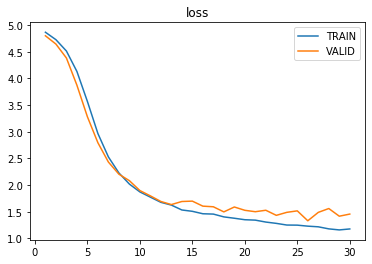

In [132]:
plt.plot()
plt.plot( list( res["TRAIN"]["loss"].keys()), list(res["TRAIN"]["loss"].values() ) , label ="TRAIN")
plt.plot( list( res["VALID"]["loss"].keys()), list(res["VALID"]["loss"].values() ) , label ="VALID")
plt.legend()
plt.title("loss")

Text(0.5, 1.0, 'accuracy')

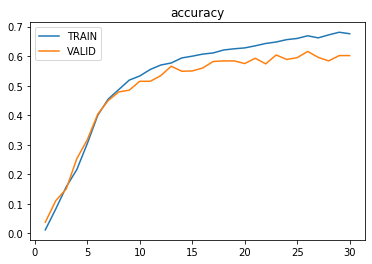

In [134]:
plt.plot()
plt.plot( list( res["TRAIN"]["accuracy"].keys()), list(res["TRAIN"]["accuracy"].values() ) , label ="TRAIN")
plt.plot( list( res["VALID"]["accuracy"].keys()), list(res["VALID"]["accuracy"].values() ) , label ="VALID")
plt.legend()
plt.title("accuracy")